# Heart Disease Prediction with Machine Learning

In this project I will be using Machine Learning to make predictions on heart disease dataset. 

### Importing library and dataset

Importing the libraris for visualization and for machine learning model.

In [28]:
import numpy as np
import pandas as pd

#for visulaizing the data
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
import seaborn as sns

#for machine learning models
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier


#Accuracy Measures
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score,precision_score,classification_report
from sklearn.model_selection import cross_val_score
%matplotlib inline

In [2]:
data = pd.read_csv('heart.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


### Checking data

Checking columns of the data and if any null values are presented.

In [4]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [5]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [6]:
#check null values
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

## Exploratory Data Analysis

1    207
0     96
Name: sex, dtype: int64


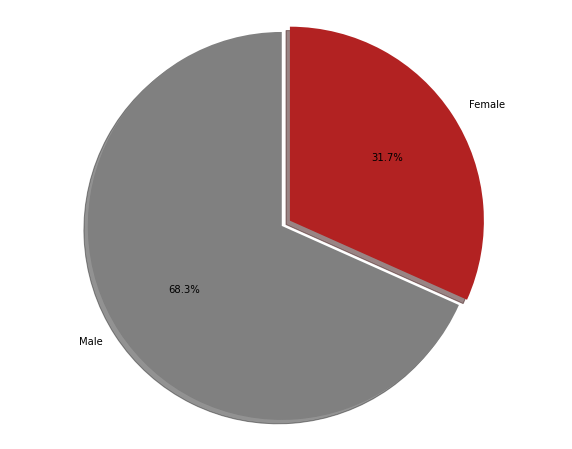

In [54]:
# male female count
print(data.sex.value_counts())
labels = 'Male', 'Female',
sizes = [207, 96]
explode = (0, 0.05)
fig1, ax1 = plt.subplots(figsize =(10,8))
ax1.pie(sizes, explode=explode,colors = ["gray","firebrick"], labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("")
plt.show()

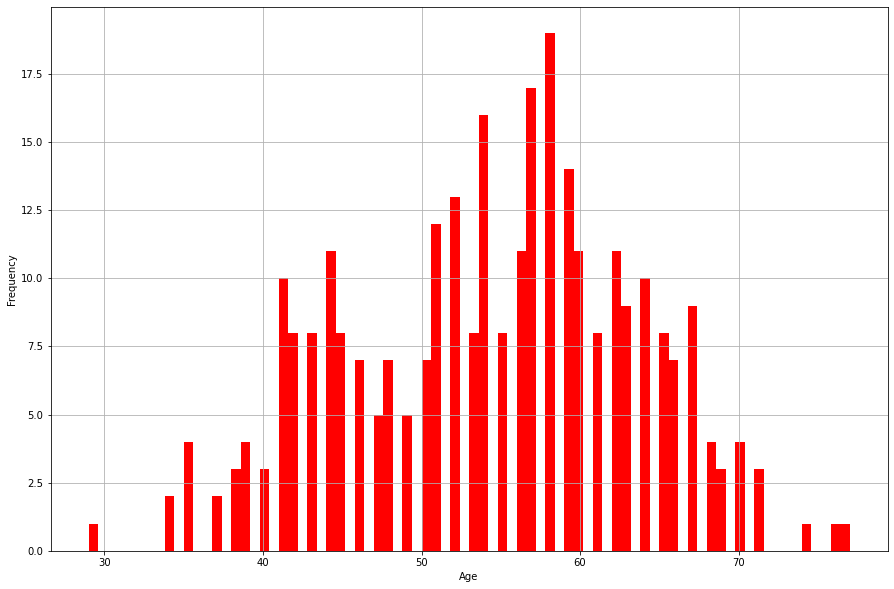

In [55]:
# frequent age
ax1 = plt.subplots(figsize =(15,10))
plt.hist(data.age, bins=80,color = "red")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.grid()
plt.show()

0    143
2     87
1     50
3     23
Name: cp, dtype: int64


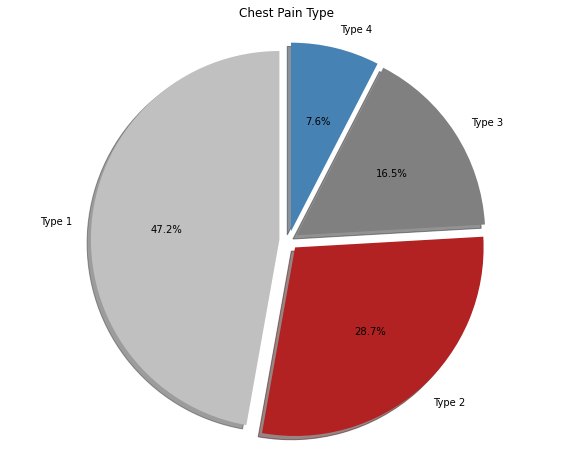

In [56]:
#chest pain type
print(data.cp.value_counts())
labels = 'Type 1', 'Type 2',  "Type 3" , "Type 4",
sizes = [143, 87,50,23]
explode = (0.05, 0.05, 0.05, 0.05)
colors = ["silver","firebrick","gray","steelblue"]
fig1, ax1 = plt.subplots(figsize =(10,8))
ax1.pie(sizes, explode=explode, labels=labels,colors=colors , autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Chest Pain Type")
plt.show()

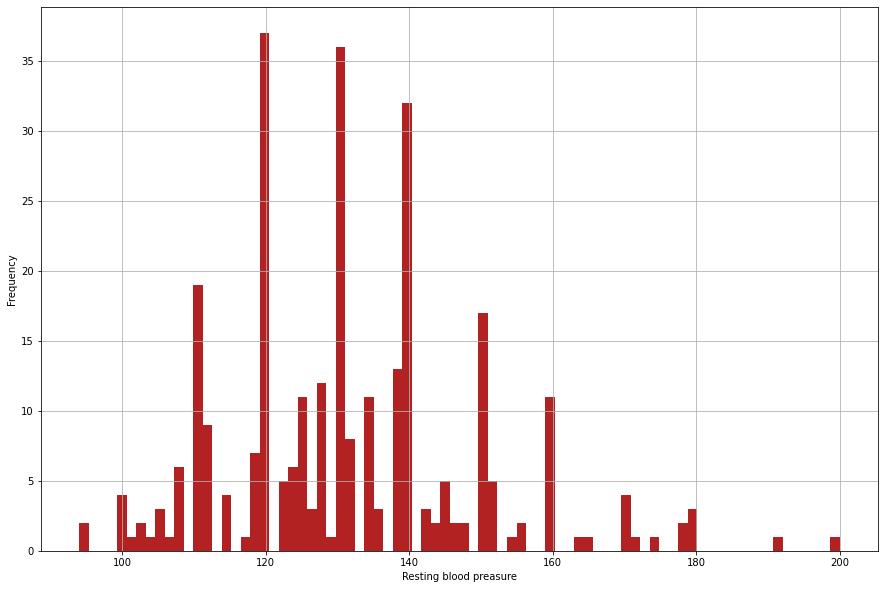

In [57]:
#resting blood presure
ax1 = plt.subplots(figsize =(15,10))
plt.hist(data.trestbps, bins=80,color = "firebrick")
plt.xlabel("Resting blood preasure")
plt.ylabel("Frequency")
plt.grid()
plt.show()

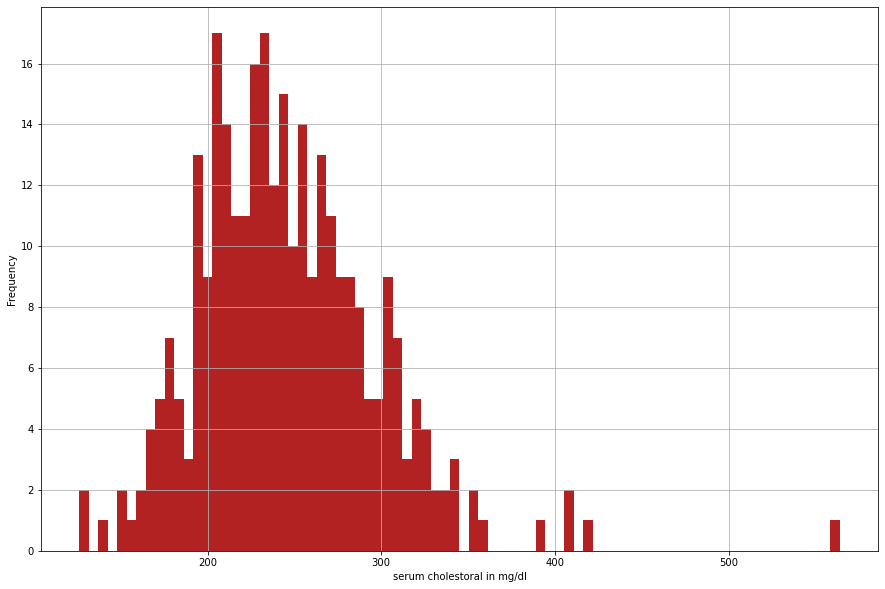

In [58]:
#serum cholestoral in mg/dl
ax1 = plt.subplots(figsize =(15,10))
plt.hist(data.chol, bins=80,color = "firebrick")
plt.xlabel("serum cholestoral in mg/dl")
plt.ylabel("Frequency")
plt.grid()
plt.show()

0    258
1     45
Name: fbs, dtype: int64


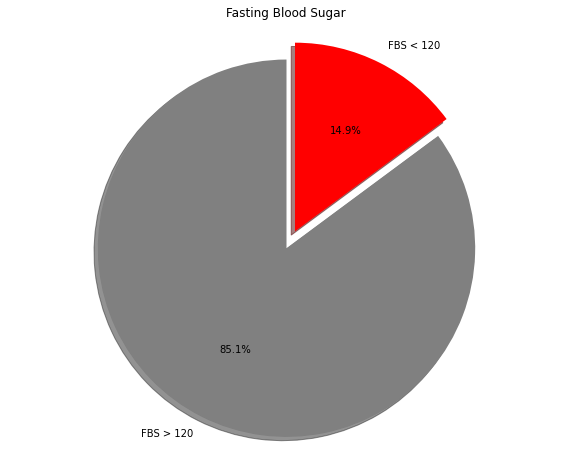

In [59]:
#Fasting bllod sugar
print(data.fbs.value_counts())
labels = 'FBS > 120', 'FBS < 120'
sizes = [258, 45]
explode = (0.05, 0.05)
colors = ["gray","red"]
fig1, ax1 = plt.subplots(figsize =(10,8))
ax1.pie(sizes, explode=explode, labels=labels,colors = colors, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Fasting Blood Sugar")
plt.show()

1    152
0    147
2      4
Name: restecg, dtype: int64


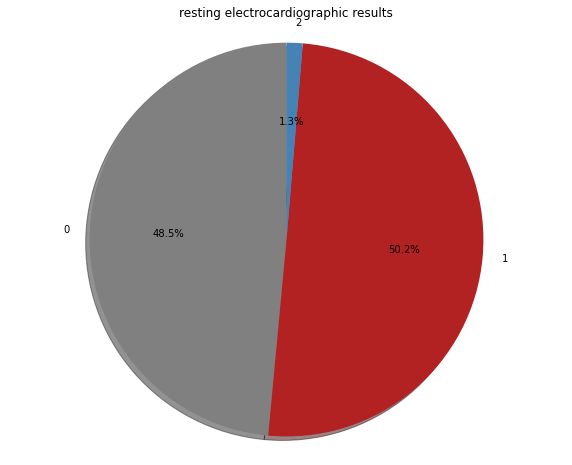

In [60]:
#resting electrocardiographic results
print(data.restecg.value_counts())
labels = '0', '1' , '2',
sizes = [147, 152,4]
explode = (0, 0,0)
colors = ["gray","firebrick","steelblue"]
fig1, ax1 = plt.subplots(figsize =(10,8))
ax1.pie(sizes, explode=explode,colors = colors, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("resting electrocardiographic results")
plt.show()

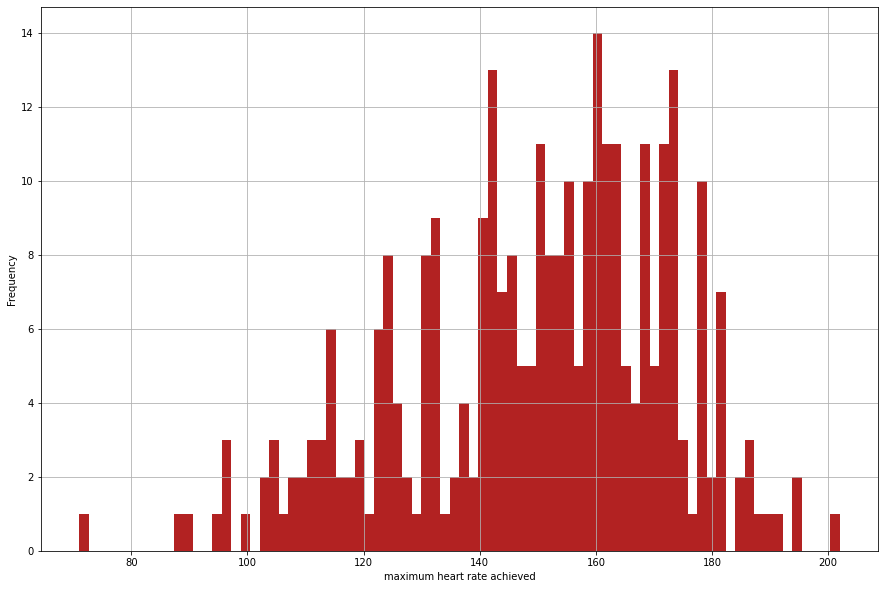

In [61]:
#maximum heart rate achived
ax1 = plt.subplots(figsize =(15,10))
plt.hist(data.thalach, bins=80,color ="firebrick")
plt.xlabel("maximum heart rate achieved")
plt.ylabel("Frequency")
plt.grid()
plt.show()

0    204
1     99
Name: exang, dtype: int64


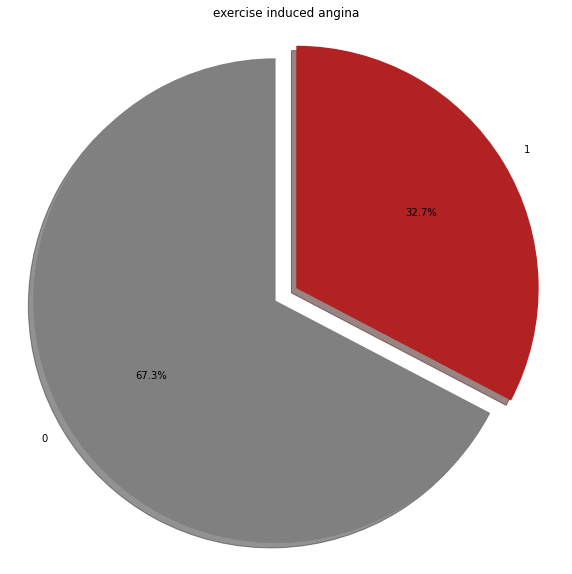

In [62]:
# exercise include angina
print(data.exang.value_counts())
labels = '0', '1' ,
sizes = [204, 99]
explode = (0.05, 0.05)
colors = ["gray","firebrick"]
fig1, ax1 = plt.subplots(figsize =(10,10))
ax1.pie(sizes, explode=explode,colors = colors, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("exercise induced angina")
plt.show()

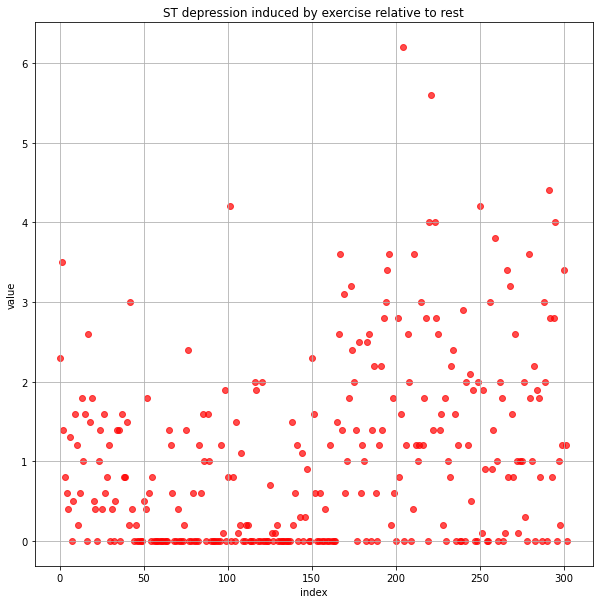

In [63]:
ax1 = plt.subplots(figsize =(10,10))
plt.scatter(data.index,data.oldpeak,color = "red",alpha = 0.7)
plt.grid()
plt.xlabel("index")
plt.ylabel("value")
plt.title("ST depression induced by exercise relative to rest")
plt.show()

2    142
1    140
0     21
Name: slope, dtype: int64


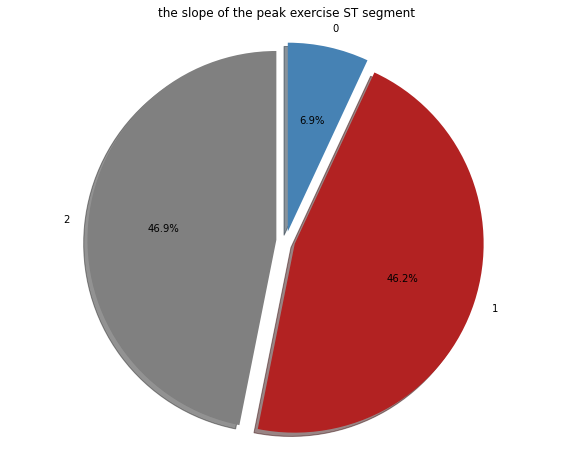

In [64]:
print(data.slope.value_counts())
labels = '2', '1' , '0' ,
sizes = [142, 140 , 21]
explode = (0.05 , 0.05 , 0.05)
colors = ["gray","firebrick","steelblue"]
fig1, ax1 = plt.subplots(figsize =(10,8))
ax1.pie(sizes, explode=explode,colors = colors, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("the slope of the peak exercise ST segment")
plt.show()

0    175
1     65
2     38
3     20
4      5
Name: ca, dtype: int64


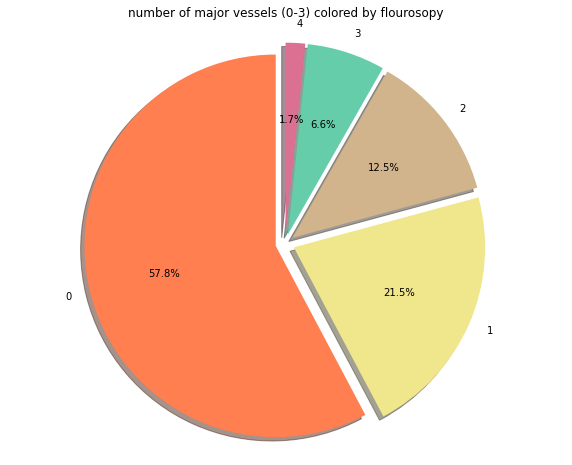

In [65]:
print(data.ca.value_counts())
labels = '0', '1' , '2' , ' 3' , '4',
sizes = [175, 65 , 38,20,5]
explode = (0.05 , 0.05 , 0.05 ,0.05 , 0.05)
colors = ["coral","khaki","tan","mediumaquamarine","palevioletred"]
fig1, ax1 = plt.subplots(figsize =(10,8))
ax1.pie(sizes, explode=explode, labels=labels,colors = colors, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("number of major vessels (0-3) colored by flourosopy")
plt.show()

2    166
3    117
1     18
0      2
Name: thal, dtype: int64


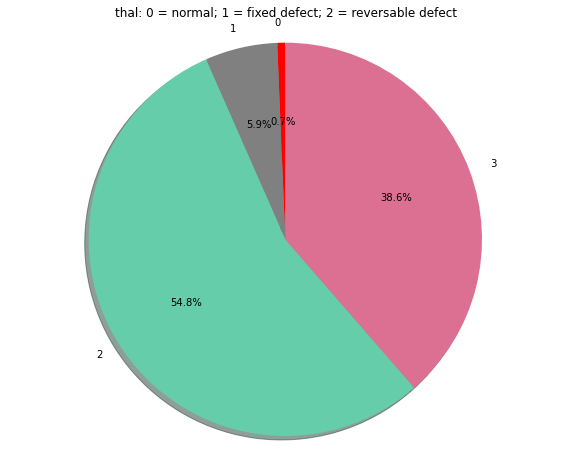

In [66]:
print(data.thal.value_counts())
labels = '0', '1' , '2' , ' 3' ,
sizes = [2, 18 , 166,117]
explode = (0 , 0 , 0 , 0)
colors = ["red","gray","mediumaquamarine","palevioletred"]
fig1, ax1 = plt.subplots(figsize =(10,8))
ax1.pie(sizes, explode=explode, labels=labels,colors = colors ,autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("thal: 0 = normal; 1 = fixed defect; 2 = reversable defect")
plt.show()

1    165
0    138
Name: target, dtype: int64


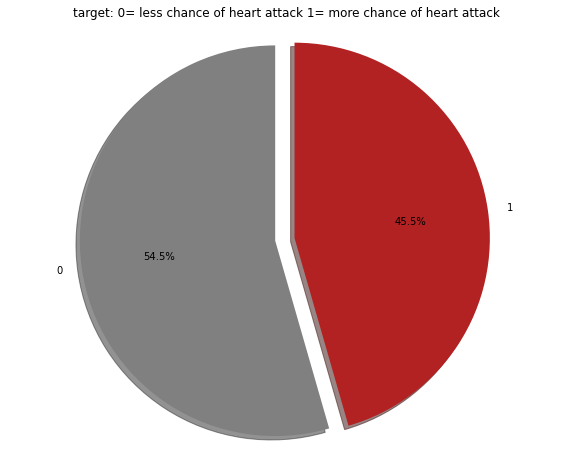

In [67]:
print(data.target.value_counts())
labels = '0', '1' ,
sizes = [165,138]
explode = (0.05 , 0.05 )
colors = ["gray","firebrick"]
fig1, ax1 = plt.subplots(figsize =(10,8))
ax1.pie(sizes, explode=explode, labels=labels,colors = colors, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("target: 0= less chance of heart attack 1= more chance of heart attack")
plt.show()

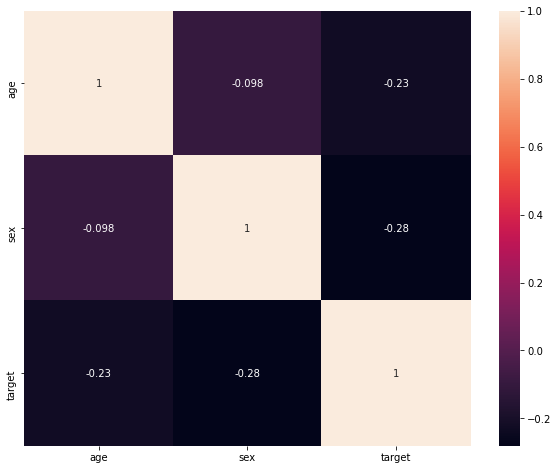

In [68]:
df = pd.DataFrame(data,columns=['age','sex','target'])
ax = plt.subplots(figsize =(10,8))
corrMatrix = df.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

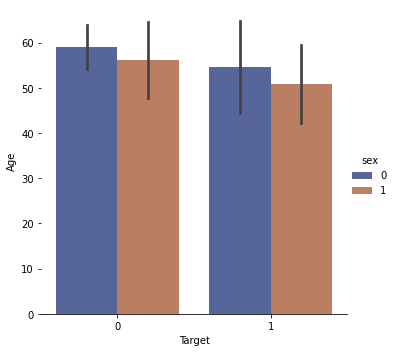

In [69]:
g = sns.catplot(
    data=data, kind="bar",
    x="target", y="age", hue="sex",
    ci="sd", palette="dark", alpha=0.7, height=5
)
g.despine(left=True)
g.set_axis_labels("Target", "Age")
plt.show()

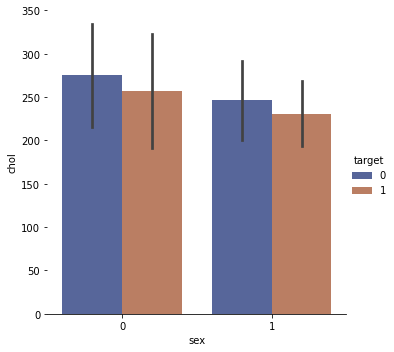

In [70]:
g = sns.catplot(
    data=data, kind="bar",
    x="sex", y="chol", hue="target",
    ci="sd", palette="dark", alpha=.7, height=5
)
g.despine(left=True)
g.set_axis_labels("sex", "chol")
plt.show()

## Feature Selection


In [18]:
data = pd.read_csv('heart.csv')

In [19]:
y = data.target

In [20]:
X = data.copy()
X = X.drop(['target'],axis=1)
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


## Scaling

In [21]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
X = scaler.fit_transform(X)

# Principal Component Analysis

In [22]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 0.9, random_state = 0)
X = pca.fit_transform(X)

In [23]:
X.shape

(303, 11)

# Train Test Split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

# Logistic Regression

In [29]:
reg = LogisticRegression().fit(X_train, y_train)

pred = normalized_data2_reg.predict(X_test)

# accuracy:
logistic_acc = accuracy_score(y_test,pred)
print(f"The accuracy score  is: {round(logistic_acc,3)*100}%")
# f1 score
log_f1 = f1_score(y_test,pred)
print(f"The f1 score is: {round(log_f1,3)*100}%")

# Precision
log_pre = precision_score(y_test,pred)
log_recall = recall_score(y_test,pred)
print(f"The recall score for LogReg is: {round(log_recall,3)*100}%")
print(f"The precision score for LogReg is: {round(log_pre,3)*100}%")

# recall

The accuracy score for LogReg is: 83.6%
The f1 score for LogReg is: 83.89999999999999%
The recall score for LogReg is: 81.2%
The precision score for LogReg is: 86.7%


Text(0.5, 1.1, 'Confusion matrix Logistic Regression\n')

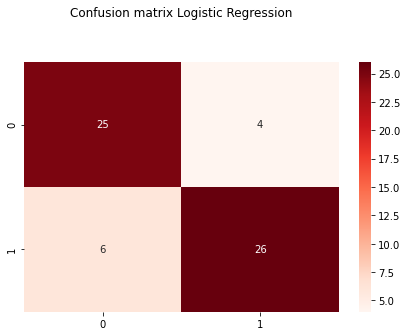

In [31]:
#confusion matrix

conf_matrix = confusion_matrix(y_test,pred)

sns.heatmap(pd.DataFrame(conf_matrix), annot=True,cmap="Reds" , fmt='g')
plt.tight_layout()
plt.title('Confusion matrix Logistic Regression\n', y=1.1)

In [30]:
svm = SVC()

#fit model
svm.fit(X_train, y_train)

pred = svm.predict(X_test)

# accuracy: 
svm_acc = accuracy_score(y_test, pred)
print(f"The accuracy score for SVM is: {round(svm_acc,3)*100}%")

# f1 score:
svm_f1 = f1_score(y_test, pred)
print(f"The f1 score for SVM is: {round(svm_f1,3)*100}%")

# Precision
svm_pre = precision_score(y_test, pred)
print(f"The precision score for SVM is: {round(svm_pre,3)*100}%")

# recall
svm_recall = recall_score(y_test, pred)
print(f"The recall score for SVM is: {round(svm_recall,3)*100}%")

The accuracy score for SVM is: 83.6%
The f1 score for SVM is: 83.89999999999999%
The precision score for SVM is: 86.7%
The recall score for SVM is: 81.2%


Text(0.5, 1.1, 'Confusion matrix SVM\n')

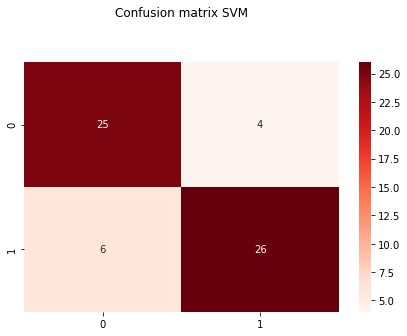

In [32]:
#confusion matrix

cnf_matrix_svm = confusion_matrix(y_test, normalized_data2_svm_pred)

sns.heatmap(pd.DataFrame(cnf_matrix_svm), annot=True,cmap="Reds" , fmt='g')

plt.tight_layout()
plt.title('Confusion matrix SVM\n', y=1.1)

# KNN

In [33]:
from sklearn.neighbors import KNeighborsClassifier

In [34]:
#elbow method
l=[]
max_first=0
li_first=range(99,1,-2)
for k_value in range(99,1,-2):
    knn = KNeighborsClassifier(n_neighbors = k_value)
    knn.fit(X_train, y_train)
    pred = knn.predict(X_test)
    f1 = f1_score(y_test, normalized_df_knn_pred)
    l.append(f1*100)
    if(f1>max_first):
        max_first=f1
value={'k-value':li_first,'F1scores':l}
kvalues = pd.DataFrame(value,columns=['k-value','F1scores'])
print('Max. F1 score: %.2f'%(max1*100),'%\n')
print("F1 scores for different values of K")
kvalues

Max. F1 score: 90.62 %

F1 scores for different values of K


,k-value,F1scores
0,99,87.878788
1,97,87.878788
2,95,87.878788
3,93,87.878788
4,91,87.878788
5,89,87.878788
6,87,87.878788
7,85,87.878788
8,83,87.878788
9,81,87.878788


In [35]:
pred = knn.predict(X_test)
ac_knn = accuracy_score(y_test, pred)

print(f"The accuracy score for KNN is: {round(ac_knn,3)*100}%")

f1knn = f1_score(y_test, pred)
print(f"The f1 score for KNN is: {round(f1knn,3)*100}%")
knnrec = recall_score(y_test, pred)
print(f"The recall score for KNN is: {round(knnrec,3)*100}%")

The accuracy score for KNN is: 83.6%
The f1 score for KNN is: 83.3%
The recall score for KNN is: 78.10000000000001%


In [36]:
testaccuracy = knn.score(X_test, y_test)
print("The accuracy score of the test data is: ",testaccuracy*100,"%")
trainaccuracy = knn.score(X_train, y_train)
print("The accuracy score of the training data is: ",round(trainaccuracy*100,2),"%")

The accuracy score of the test data is:  83.60655737704919 %
The accuracy score of the training data is:  88.43 %


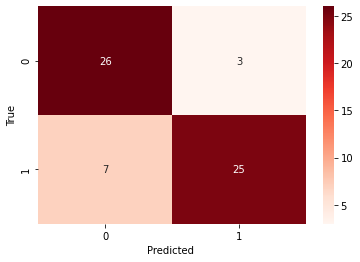

In [37]:
knn_confmat = confusion_matrix(y_test, normalized_df_knn_pred)

ax= plt.subplot()
sns.heatmap(pd.DataFrame(knn_confmat), annot=True,cmap="Reds" , fmt='g')

ax.set_xlabel('Predicted ');ax.set_ylabel('True'); 

# Decision Tree

In [38]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
#model
d_tree = DecisionTreeClassifier()

# fit model
d_tree.fit(X_train, y_train)

pred = d_tree.predict(X_test)

# accuracy: 
d_tree_acc = accuracy_score(y_test, pred)
print(f"The accuracy score for DecisionTreeClassifier is: {round(d_tree_acc,3)*100}%")

# f1 score:
dtree_f1 = f1_score(y_test, pred)
print(f"The f1 score for DecisionTreeClassifier is: {round(dtree_f1,3)*100}%")
# Precision:
dtree_prec = precision_score(y_test, pred)
print(f"The precision score for DecisionTreeClassifier is: {round(dtree_prec,3)*100}%")

# recall 
dtree_rec = recall_score(y_test, pred)
print(f"The recall score for DecisionTreeClassifier is: {round(dtree_rec,3)*100}%")

The accuracy score for DecisionTreeClassifier is: 75.4%
The f1 score for DecisionTreeClassifier is: 72.7%
The precision score for DecisionTreeClassifier is: 87.0%
The recall score for DecisionTreeClassifier is: 62.5%


Text(0.5, 1.1, 'Confusion matrix Decision Tree\n')

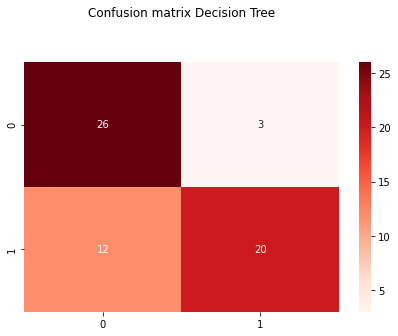

In [40]:


dtree_cnf = confusion_matrix(y_test, pred)
ax = plt.subplot()
sns.heatmap(pd.DataFrame(dtree_cnf), annot=True,cmap="Reds" , fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix Decision Tree\n', y=1.1)

# Naive Bayes

In [41]:
#Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

#Create a Classifier
model = GaussianNB()

# Train the model
model.fit(X_train,y_train)
pred_rand= model.predict(X_test)
accrf=accuracy_score(y_test, pred_rand)
print(f"Accuracy of Naive Bayesian is: {round(accrf,3)*100}%")
# f1
f1rf = f1_score(y_test, pred_rand)
print(f"The f1 score for Naive Bayesian is: {round(f1rf,3)*100}%")

# Precision
precisionrf = precision_score(y_test,pred_rand)
print(f"The precision score for Naive Bayesian is: {round(precisionrf,3)*100}%")

# recall
recallrf = recall_score(y_test, pred_rand)
print(f"The recall score for Naive Bayesian is: {round(recallrf,3)*100}%")

Accuracy of Naive Bayesian is: 85.2%
The f1 score for Naive Bayesian is: 85.2%
The precision score for Naive Bayesian is: 89.7%
The recall score for Naive Bayesian is: 81.2%


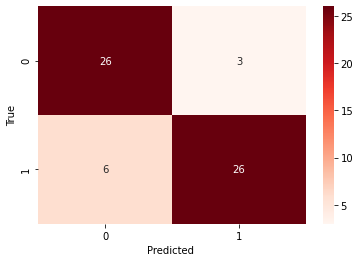

In [42]:
# confusion matrix

cnf_matrix_bayesian = confusion_matrix(y_test, pred_rand)

ax= plt.subplot()
sns.heatmap(pd.DataFrame(cnf_matrix_bayesian), annot=True,cmap="Reds" , fmt='g')

ax.set_xlabel('Predicted ');ax.set_ylabel('True'); 

# Random Forest

In [44]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier()

#Train the model
clf.fit(X_train,y_train)

pred_rand=clf.predict(X_test)
print("Accuracy of Random Forest is:",metrics.accuracy_score(y_test, pred_rand)*100)

Accuracy of Random Forest is: 85.24590163934425


In [45]:
# accuracy
accrand = accuracy_score(y_test, pred_rand)
print(f"The accuracy score for Random Forest is: {round(accrand,3)*100}%")
# f1 score:
f1rand = f1_score(y_test, pred_rand)
print(f"The f1 score for Random Forest is: {round(f1rand,3)*100}%")

# Precision 
precisionrand = precision_score(y_test, pred_rand)
print(f"The precision score for Random Forest is: {round(precisionrand,3)*100}%")

# recall
recallrand = recall_score(y_test, pred_rand)
print(f"The recall score for Random Forest is: {round(recallrand,3)*100}%")

The accuracy score for Random Forest is: 85.2%
The f1 score for Random Forest is: 85.2%
The precision score for Random Forest is: 89.7%
The recall score for Random Forest is: 81.2%


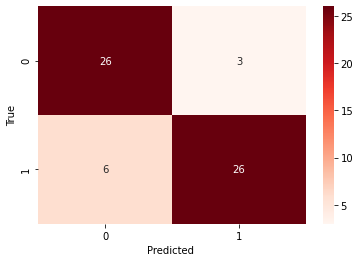

In [46]:
#confusion matri

cnf_matrix_random = confusion_matrix(y_test, pred_rand)

ax= plt.subplot()
sns.heatmap(pd.DataFrame(cnf_matrix_random), annot=True,cmap="Reds" , fmt='g')

ax.set_xlabel('Predicted ');ax.set_ylabel('True');

# Results

In [48]:
cv_results = cross_val_score(clf, X, y, cv=5) 

print ("Cross-validated scores:", cv_results)
print("The Accuracy of Model with Cross Validation is: {0:.2f}%".format(cv_results.mean() * 100))

Cross-validated scores: [0.78688525 0.86885246 0.75409836 0.81666667 0.73333333]
The Accuracy of Model with Cross Validation is: 79.20%


In [49]:
scores = {'Model':['Logistic Regression','KNN','Decission Tree','Svm','Naive Bayesian Classification','Random Forest'],'F1-Score':['%0.2f'%(f1log*100),'%0.2f'%(knn_f1*100),'%0.2f'%(f1dt*100),'%0.2f'%(f1svm*100),'%0.2f'%(f1rf*100),'%0.2f'%(f1rand*100)],'Accuracy':['%0.2f'%(acclog*100),'%0.2f'%(knn_acc*100),'%0.2f'%(accdt*100),'%0.2f'%(accsvm*100),'%0.2f'%(accrf*100),'%0.2f'%(accrand*100)],'Recall':['%0.2f'%(recalllog*100),'%0.2f'%(knn_recall*100),'%0.2f'%(recalldt*100),'%0.2f'%(recallsvm*100),'%0.2f'%(recallrf*100),'%0.2f'%(recallrand*100)]}

Scores = pd.DataFrame(scores,columns=['Model','F1-Score','Accuracy','Recall'])
print("The Scores Obtained from the above applied Machine Learning Algorithms :")
Scores

The Scores Obtained from the above applied Machine Learning Algorithms :


,Model,F1-Score,Accuracy,Recall
0,Logistic Regression,83.87,83.61,81.25
1,KNN,83.33,83.61,78.12
2,Decission Tree,72.73,75.41,62.50
3,Svm,83.87,83.61,81.25
4,Naive Bayesian Classification,85.25,85.25,81.25
5,Random Forest,85.25,85.25,81.25
